In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from copy import  copy
import networkx as nx


from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG

In [2]:
vk_data = pd.read_csv('vk_profiles.csv')
vk_data.head(10)

,age,sex,is_closed,has_high_education,relation_status,number_of_relatives,len_of_about,number_of_activities,number_of_books,number_of_friends,number_of_followers,number_of_interests,number_of_groups,number_of_movies,len_of_status,age_hidden
0,34,1,0,1,1,2,14,1,1,911,720,1,10,1,16,0
1,0,1,0,0,0,0,0,0,0,687,87638,0,139,0,0,1
2,37,1,0,0,0,0,0,0,0,24,0,0,11,0,2,0
3,37,1,0,0,0,0,0,0,0,2535,3916,0,137,0,0,0
4,39,1,0,1,4,0,0,1,1,291,317,1,2,1,11,0
5,34,1,0,0,0,0,0,0,0,413,328,0,37,0,11,0
6,36,0,0,0,0,0,0,0,0,175,474,0,8,0,0,0
7,0,0,0,0,0,0,0,0,0,982,7458,0,432,0,3,1
8,35,0,0,0,0,0,0,0,0,279,2659,0,41,0,0,0
9,41,0,0,0,0,0,0,0,0,134,651,0,24,0,0,0


C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

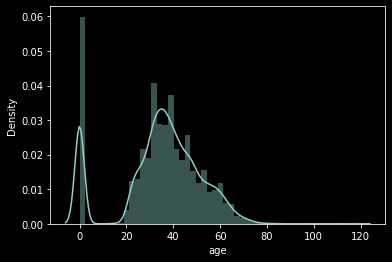

In [3]:
sns.distplot(vk_data['age'])

In [4]:
vk_data = vk_data.loc[(vk_data['age'] != 0)]

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

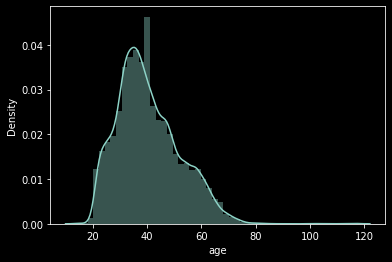

In [5]:
sns.distplot(vk_data['age'])

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


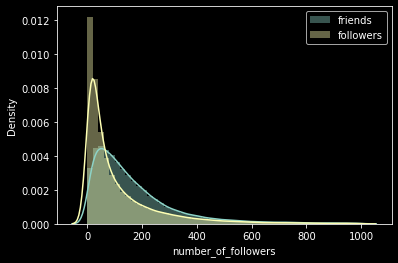

In [6]:
sns.distplot(vk_data['number_of_friends'].loc[vk_data['number_of_friends']<1000],label='friends')
sns.distplot(vk_data['number_of_followers'].loc[vk_data['number_of_followers']<1000], label='followers')
plt.legend()

In [7]:
transformed_data = copy(vk_data)
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(vk_data.values[:,[0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]])
transformed_data[['age', 'number_of_relatives',	'len_of_about',	'number_of_activities',	'number_of_books',	'number_of_friends',	'number_of_followers',	'number_of_interests',	'number_of_groups',	'number_of_movies',	'len_of_status']] = data_discrete

In [8]:
hc = HillClimbSearch(transformed_data, scoring_method=K2Score(transformed_data))

In [9]:
best_model = hc.estimate()

  0%|          | 31/1000000 [00:13<119:13:33,  2.33it/s]


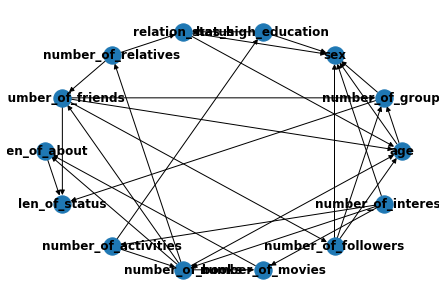

In [10]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [11]:
blacklist = [(x, y) for x in transformed_data.columns.to_list() for y in ['age', 'sex'] if x != y]
blacklist

[('age', 'sex'),
 ('sex', 'age'),
 ('is_closed', 'age'),
 ('is_closed', 'sex'),
 ('has_high_education', 'age'),
 ('has_high_education', 'sex'),
 ('relation_status', 'age'),
 ('relation_status', 'sex'),
 ('number_of_relatives', 'age'),
 ('number_of_relatives', 'sex'),
 ('len_of_about', 'age'),
 ('len_of_about', 'sex'),
 ('number_of_activities', 'age'),
 ('number_of_activities', 'sex'),
 ('number_of_books', 'age'),
 ('number_of_books', 'sex'),
 ('number_of_friends', 'age'),
 ('number_of_friends', 'sex'),
 ('number_of_followers', 'age'),
 ('number_of_followers', 'sex'),
 ('number_of_interests', 'age'),
 ('number_of_interests', 'sex'),
 ('number_of_groups', 'age'),
 ('number_of_groups', 'sex'),
 ('number_of_movies', 'age'),
 ('number_of_movies', 'sex'),
 ('len_of_status', 'age'),
 ('len_of_status', 'sex'),
 ('age_hidden', 'age'),
 ('age_hidden', 'sex')]

In [12]:
best_model_new = hc.estimate(black_list=blacklist)

  0%|          | 24/1000000 [00:07<86:15:56,  3.22it/s]


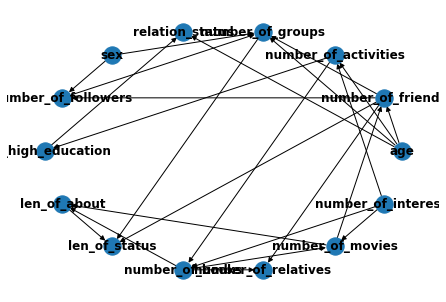

In [13]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model_new.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [14]:
def sampling (bn: DAG, data: pd.DataFrame, n: int = 100):
    bn_new = BayesianModel(bn.edges())
    bn_new.fit(data)
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n, return_type='dataframe')
    return sample

In [15]:
hc_BicScore = HillClimbSearch(transformed_data, scoring_method=BicScore(transformed_data))
best_model_BicScore = hc_BicScore.estimate(black_list=blacklist)

  0%|          | 24/1000000 [00:07<87:12:20,  3.19it/s]


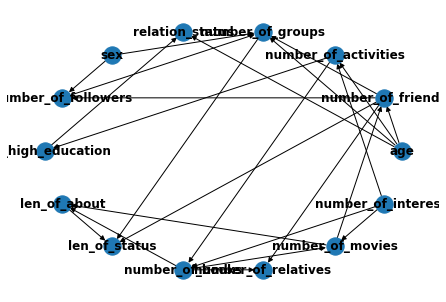

In [16]:
G_BicScore = nx.DiGraph()
G_BicScore.add_edges_from(best_model_BicScore.edges())
pos = nx.layout.circular_layout(G_BicScore)
nx.draw(G_BicScore, pos, with_labels=True,font_weight='bold')

In [17]:
def draw_comparative_hist (parametr: str, original_data: pd.DataFrame, data_sampled: pd.DataFrame):
    final_df = pd.DataFrame()
    df1 = pd.DataFrame()
    df1[parametr] = original_data[parametr]
    df1['Data'] = 'Original data'
    df1['Probability'] = df1[parametr].apply(lambda x: (df1.groupby(parametr)[parametr].count()[x])/original_data.shape[0])
    df2 = pd.DataFrame()
    df2[parametr] = data_sampled[parametr]
    df2['Data'] = 'Synthetic data'
    df2['Probability'] = df2[parametr].apply(lambda x: (df2.groupby(parametr)[parametr].count()[x])/data_sampled.shape[0])
    final_df = pd.concat([df1, df2])
    sns.barplot(x=parametr, y="Probability", hue="Data", data=final_df)
    plt.show()

In [18]:
sample_Bic = sampling(best_model_BicScore, transformed_data, 46193)

Generating for node: len_of_status: 100%|██████████| 14/14 [00:02<00:00,  5.98it/s]


In [19]:
sample_Bic[['age', 'number_of_relatives',	'len_of_about',	'number_of_activities',	'number_of_books',	'number_of_friends',	'number_of_followers',	'number_of_interests',	'number_of_groups',	'number_of_movies',	'len_of_status']] = est.inverse_transform(sample_Bic[['age', 'number_of_relatives',	'len_of_about',	'number_of_activities',	'number_of_books',	'number_of_friends',	'number_of_followers',	'number_of_interests',	'number_of_groups',	'number_of_movies',	'len_of_status']].values)

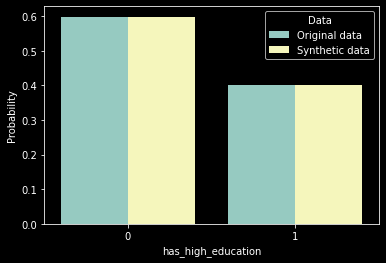

In [20]:
draw_comparative_hist('has_high_education',transformed_data,sample_Bic)

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


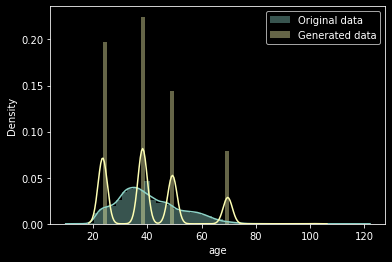

In [21]:
sns.distplot(vk_data['age'], label='Original data')
sns.distplot(sample_Bic['age'], label='Generated data')
plt.legend()

In [22]:
sample_k2 = sampling(best_model_new, transformed_data, 46193)

Generating for node: len_of_status: 100%|██████████| 14/14 [00:01<00:00,  7.37it/s]


In [23]:
sample_k2[['age', 'number_of_relatives',	'len_of_about',	'number_of_activities',	'number_of_books',	'number_of_friends',	'number_of_followers',	'number_of_interests',	'number_of_groups',	'number_of_movies',	'len_of_status']] = est.inverse_transform(sample_k2[['age', 'number_of_relatives',	'len_of_about',	'number_of_activities',	'number_of_books',	'number_of_friends',	'number_of_followers',	'number_of_interests',	'number_of_groups',	'number_of_movies',	'len_of_status']].values)

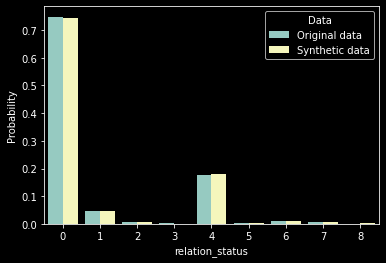

In [24]:
draw_comparative_hist('relation_status',transformed_data,sample_Bic)

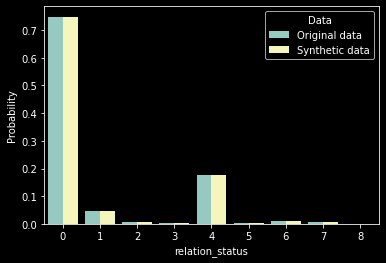

In [25]:
draw_comparative_hist('relation_status',transformed_data,sample_k2)